In [50]:
pd.set_option('display.max_columns', 100)


In [49]:
# 1.14
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [48]:
# 1.12 Misc
import time
import os
import gc
import random

# 1.13 Used in Randomized parameter search
from scipy.stats import uniform

In [45]:
# 1.9 Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

# 1.10
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# 1.11 Permutation feature importance
from sklearn.inspection import permutation_importance

In [43]:
# 1.2 Data pre-processing
#     z = (x-mean)/stdev
from sklearn.preprocessing import StandardScaler as ss

# 1.3 Dimensionality reduction and noise removal
from sklearn.decomposition import PCA

# 1.4 Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# 1.5 Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# 1.6 Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 1.7.1
#     pip install scikit-optimize
#     pip install 'scikit-optimize[plots]'
#     Refer: https://github.com/scikit-optimize/scikit-optimize
#     conda install -c conda-forge scikit-optimize
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer

# 1.8 Modeling modules
#     Call sklearn wrapper of xgboost
# """Scikit-Learn Wrapper interface for XGBoost."""
#  """Implementation of the Scikit-Learn API for XGBoost.
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn
# Stackoverflow:
# https://stackoverflow.com/a/34696477
# https://stackoverflow.com/a/46947191
# Install as: conda install -c anaconda py-xgboost
from xgboost.sklearn import XGBClassifier

In [2]:
import os
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import pandas as pd
from time import time
import pprint
import joblib
import warnings
warnings.filterwarnings("ignore")

# Classifiers
from catboost import CatBoostClassifier

# Model selection
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

# Skopt functions
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, VerboseCallback, DeltaXStopper
from skopt.space import Real, Categorical, Integer
from time import time

from sklearn.preprocessing import StandardScaler as ss
from sklearn.decomposition import PCA
from xgboost.sklearn import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

from scipy.stats import uniform

from sklearn.preprocessing import StandardScaler

import seaborn as sns

from sklearn.ensemble import RandomForestClassifier


In [37]:
# 1.0 Call libraries
import pandas as pd
import numpy as np
from  sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
import os,requests,io
from sklearn import set_config

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing the DataFrame

In [29]:
import pandas as pd
df=pd.read_csv('top_200_youtubers.csv') 
###Shape of the dataframe
size=df.shape
print(size)


(857, 22)


# Printing the head of the dataframe


In [3]:
print(df.head())


  Country               Channel Name       Category Main Video Category  \
0      IN                   T-Series  Gaming & Apps               Music   
1      US  ABCkidTV - Nursery Rhymes  Gaming & Apps           Education   
2      IN                  SET India  Gaming & Apps               Shows   
3      US                  PewDiePie  Gaming & Apps              Gaming   
4      US                    MrBeast  Gaming & Apps       Entertainment   

                    username  followers     Main topic  \
0                   T-Series  220000000  Music of Asia   
1  ABCkidTV - Nursery Rhymes  138000000         Movies   
2                  SET India  137000000         Movies   
3                  PewDiePie  111000000      Lifestyle   
4                    MrBeast   98100000      Lifestyle   

                                         More topics         Likes  \
0           Entertainment,Music of Asia,Music,Movies  1.602680e+09   
1                         Entertainment,Music,Movies  2.2099

### Removing the duplicate values in the channel column as part of cleaning the data

In [4]:
df=df.drop_duplicates("Channel Name")

# To check for NullValues in the DataFrame

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 656
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 164 non-null    object 
 1   Channel Name            200 non-null    object 
 2   Category                164 non-null    object 
 3   Main Video Category     199 non-null    object 
 4   username                200 non-null    object 
 5   followers               200 non-null    int64  
 6   Main topic              199 non-null    object 
 7   More topics             199 non-null    object 
 8   Likes                   200 non-null    float64
 9   Boost Index             200 non-null    int64  
 10  Engagement Rate         199 non-null    float64
 11  Engagement Rate 60days  200 non-null    float64
 12  Views                   200 non-null    int64  
 13  Views Avg.              199 non-null    float64
 14  Avg. 1 Day              117 non-null    fl

#### So we infer that rows Country, Category,Main vedio category, Main vedio topics, More topics, Engagement Rates,Views avg, Avg.1 Day,Avg. 3 Day, Avg. 7 Day, Avg. 14 Day, Avg. 30 Day, Comments Avg has missing NullValues

# Handling missing values

### Missing values can either be filled or dropped depending on their value in the dataframe

#### 1.Filling numeric columns


##### 1.Filling Views Avg

In [6]:
import numpy as np
df["Views Avg."].fillna(np.mean(df["Views Avg."]),inplace=True)

### Create a heatmap in order to find out which parametres are highly influention for the columns. This will make us fill the missing values with more authenticity.

<AxesSubplot:>

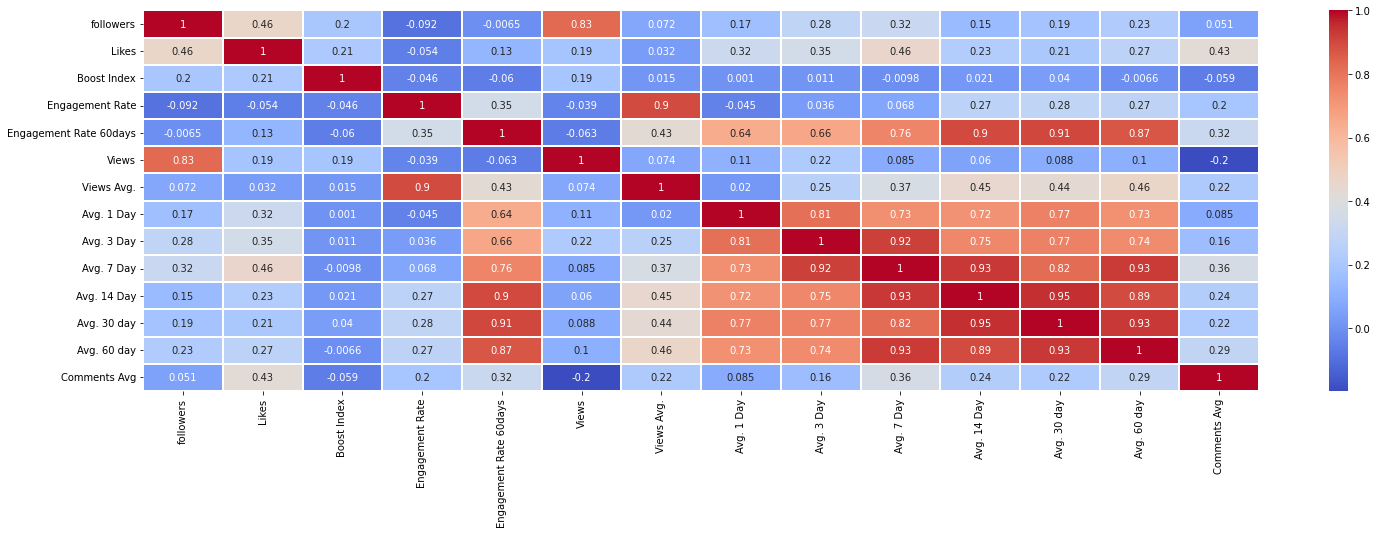

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.3,cmap="coolwarm")

#### There are 2 ways of filling these values:
#### 1. Based on the correlation values found through heatmap
#### 2. Based on grouping few categorical columns and filling those groups by mean

In [8]:
df["Comments Avg"].fillna(df["Comments Avg"].mean(),inplace=True)
grp1=df.groupby(["Main topic"])
df["Avg. 1 Day"]=grp1["Avg. 3 Day"].transform(lambda x:x.fillna(x.mean()))
df["Engagement Rate"]=grp1["Engagement Rate 60days"].transform(lambda x:x.fillna(x.mean()))
df = df.dropna(axis=0,subset=['Avg. 1 Day'])
print(df.info())




<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 656
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 163 non-null    object 
 1   Channel Name            197 non-null    object 
 2   Category                163 non-null    object 
 3   Main Video Category     197 non-null    object 
 4   username                197 non-null    object 
 5   followers               197 non-null    int64  
 6   Main topic              197 non-null    object 
 7   More topics             197 non-null    object 
 8   Likes                   197 non-null    float64
 9   Boost Index             197 non-null    int64  
 10  Engagement Rate         197 non-null    float64
 11  Engagement Rate 60days  197 non-null    float64
 12  Views                   197 non-null    int64  
 13  Views Avg.              197 non-null    float64
 14  Avg. 1 Day              197 non-null    fl

#### For handling the Nan Values in country value:
##### Calculate the null percentage
###### p= (no.of.null values in the column/Length of the column)*100
##### p=((200-164)/200)*100
#### (p=36/200)*100= 18%
### 18 percentage is a significant data loss. So we cant drop the rows completely as such. So we need to find a method to fill the values
##### But here, we have no other parameter to associate with country and fill. So better to drop them

In [9]:
df = df.dropna(axis=0,subset=['Country'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 656
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 163 non-null    object 
 1   Channel Name            163 non-null    object 
 2   Category                133 non-null    object 
 3   Main Video Category     163 non-null    object 
 4   username                163 non-null    object 
 5   followers               163 non-null    int64  
 6   Main topic              163 non-null    object 
 7   More topics             163 non-null    object 
 8   Likes                   163 non-null    float64
 9   Boost Index             163 non-null    int64  
 10  Engagement Rate         163 non-null    float64
 11  Engagement Rate 60days  163 non-null    float64
 12  Views                   163 non-null    int64  
 13  Views Avg.              163 non-null    float64
 14  Avg. 1 Day              163 non-null    fl

#### From the heatmap we can infer that Avg 3 day has highest correlation with Avg 7 day

In [10]:
grp1=df.groupby(["Main topic"])
df["Avg. 3 Day"]=grp1["Avg. 7 Day"].transform(lambda x:x.fillna(x.mean()))


#### From the heatmap we infer that Avg 7 day has highest correlation with Avg 14 day and Avg 60 day equally. Since 60 day doesnt have any null values let us fill Nan using that column

In [11]:
grp1=df.groupby(["Main topic"])
df["Avg. 7 Day"]=grp1["Avg. 60 day"].transform(lambda x:x.fillna(x.mean()))


#### From the heatmap we infer that Avg 14 day has highest correlation with Avg 30 day.

In [12]:
df["Avg. 14 Day"]=grp1["Avg. 30 day"].transform(lambda x:x.fillna(x.mean()))


#### From the heatmap we infer that Avg 30 days has highest correlation with Avg 14 day

In [13]:
df["Avg. 30 Day"]=grp1["Avg. 14 Day"].transform(lambda x:x.fillna(x.mean()))


### Fully dropped and filled DataSet info

In [14]:
print(df.info())
print("No of Rows:",df.shape[0])
print("No of Columns",df.shape[1])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 656
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 163 non-null    object 
 1   Channel Name            163 non-null    object 
 2   Category                133 non-null    object 
 3   Main Video Category     163 non-null    object 
 4   username                163 non-null    object 
 5   followers               163 non-null    int64  
 6   Main topic              163 non-null    object 
 7   More topics             163 non-null    object 
 8   Likes                   163 non-null    float64
 9   Boost Index             163 non-null    int64  
 10  Engagement Rate         163 non-null    float64
 11  Engagement Rate 60days  163 non-null    float64
 12  Views                   163 non-null    int64  
 13  Views Avg.              163 non-null    float64
 14  Avg. 1 Day              163 non-null    fl

## Now the next step of pre-processing data is to check for outliers and remove them.

### Outliers can be checked using boxplot

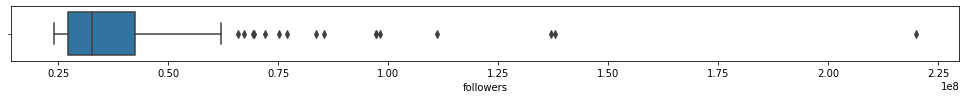

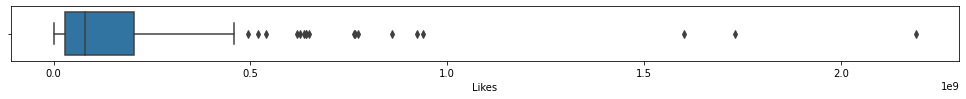

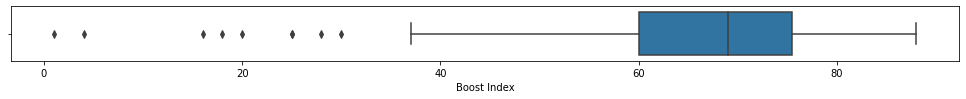

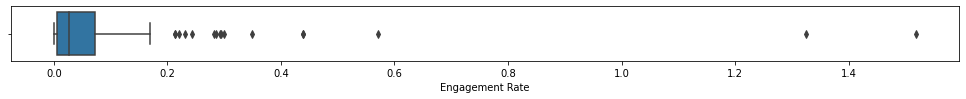

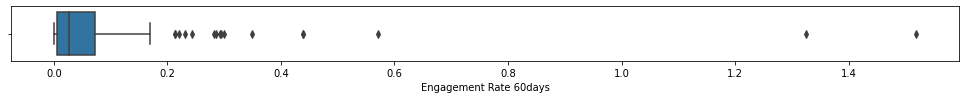

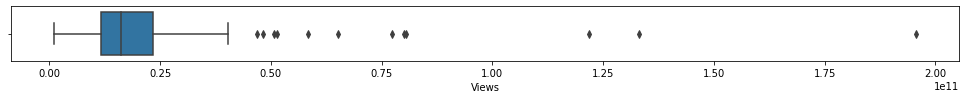

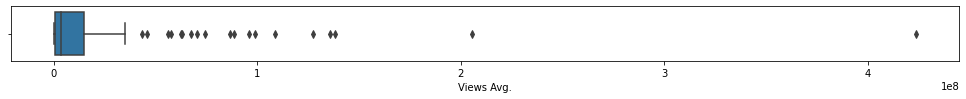

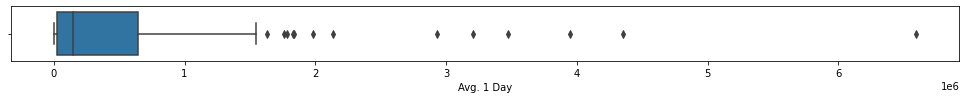

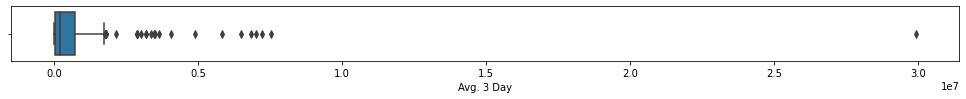

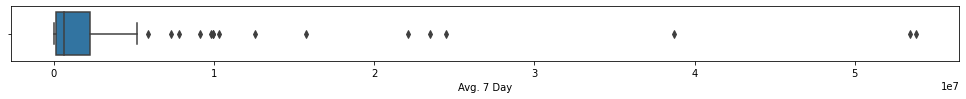

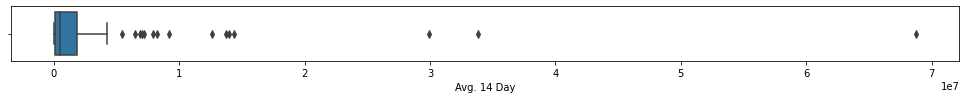

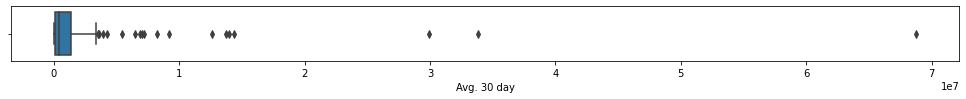

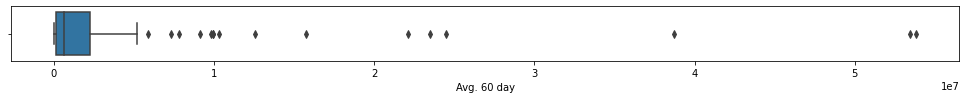

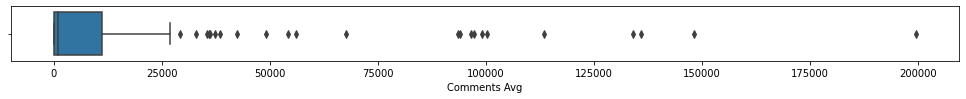

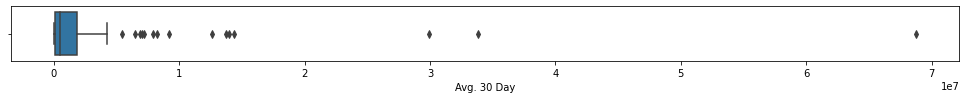

In [15]:
df1=df.select_dtypes(exclude=["object"])
for col in df1:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=df1,x=col)

### Removing these outliers can be done using a method called as IQR Calculation

In [16]:
for i in df1:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR 
    print("lower for",i,"=",lower)
    print("upper for",i,"=",upper)
    print("\n")
    df_no=df[(df[i]>lower)&(df[i]<upper)]
    

lower for followers = 4375000.0
upper for followers = 65375000.0


lower for Likes = -233966980.3508337
upper for Likes = 467658994.13679045


lower for Boost Index = 36.75
upper for Boost Index = 98.75


lower for Engagement Rate = -0.09272407122372851
upper for Engagement Rate = 0.17187756556571554


lower for Engagement Rate 60days = -0.09272407122372851
upper for Engagement Rate 60days = 0.17187756556571554


lower for Views = -5932215145.25
upper for Views = 40834126984.75


lower for Views Avg. = -20901149.609623015
upper for Views Avg. = 36341787.89910714


lower for Avg. 1 Day = -908540.5000000001
upper for Avg. 1 Day = 1580231.1


lower for Avg. 3 Day = -991827.2532375032
upper for Avg. 3 Day = 1754292.9057886559


lower for Avg. 7 Day = -3128835.200411596
upper for Avg. 7 Day = 5502045.518355526


lower for Avg. 14 Day = -2606933.554636317
upper for Avg. 14 Day = 4580070.292781791


lower for Avg. 30 day = -1888033.744871795
upper for Avg. 30 day = 3378135.66025641


lower fo

In [17]:
df_no.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 656
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 148 non-null    object 
 1   Channel Name            148 non-null    object 
 2   Category                122 non-null    object 
 3   Main Video Category     148 non-null    object 
 4   username                148 non-null    object 
 5   followers               148 non-null    int64  
 6   Main topic              148 non-null    object 
 7   More topics             148 non-null    object 
 8   Likes                   148 non-null    float64
 9   Boost Index             148 non-null    int64  
 10  Engagement Rate         148 non-null    float64
 11  Engagement Rate 60days  148 non-null    float64
 12  Views                   148 non-null    int64  
 13  Views Avg.              148 non-null    float64
 14  Avg. 1 Day              148 non-null    fl

# Visualisation Techniques for the cleaned data

### Country having highest number of top youtubers

In [18]:
country=df_no.Country.value_counts().nlargest(15)

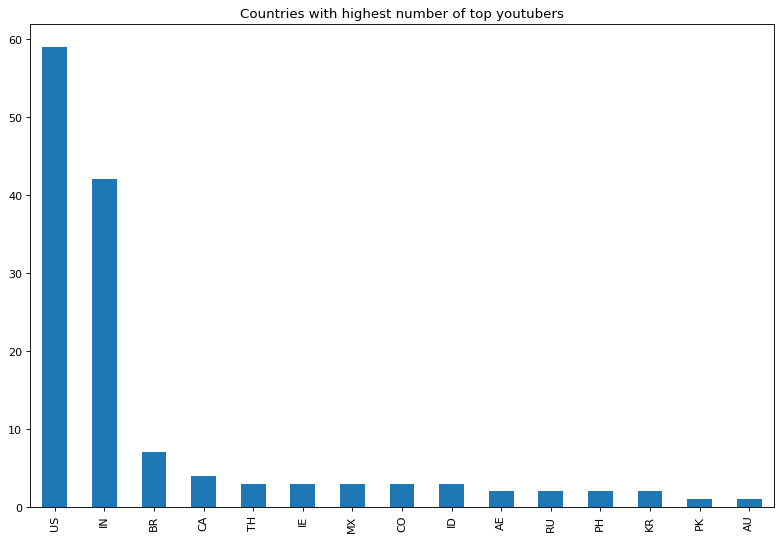

In [19]:
plt.figure(figsize=(12,8),dpi=80)
country.plot.bar()
plt.title("Countries with highest number of top youtubers")
plt.show()

### The most preferred genres by audience

### By bar graph

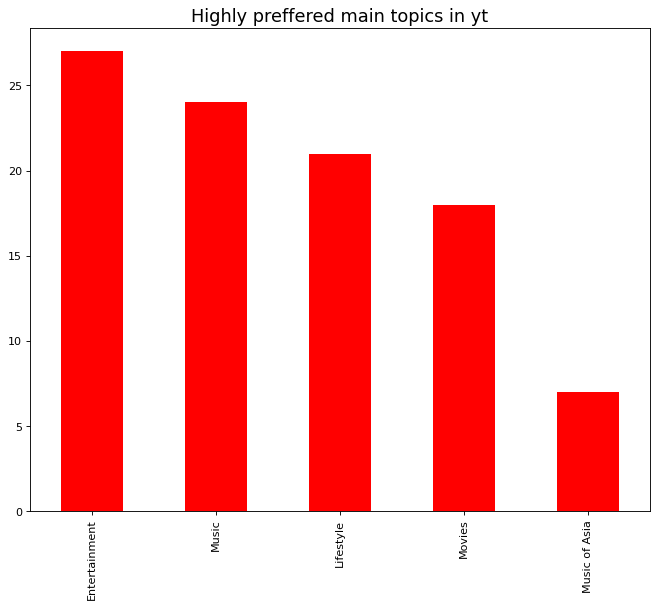

In [20]:
df2=df_no.rename(columns={"Main topic":"Main_topic"})
genre=df2.Main_topic.value_counts().nlargest(5)
plt.figure(figsize=(10,8),dpi=80)
genre.plot.bar(color='#ff0000')
plt.title("Highly preffered main topics in yt",fontsize=16)
plt.show()


### By Piechart

<AxesSubplot:ylabel='Main topic'>

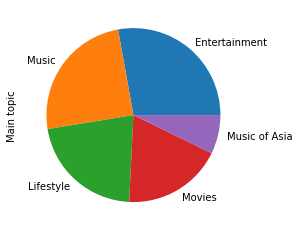

In [21]:
df_no["Main topic"].value_counts().nlargest(5).plot(kind="pie")

### Youtubers with highest number of subscribers

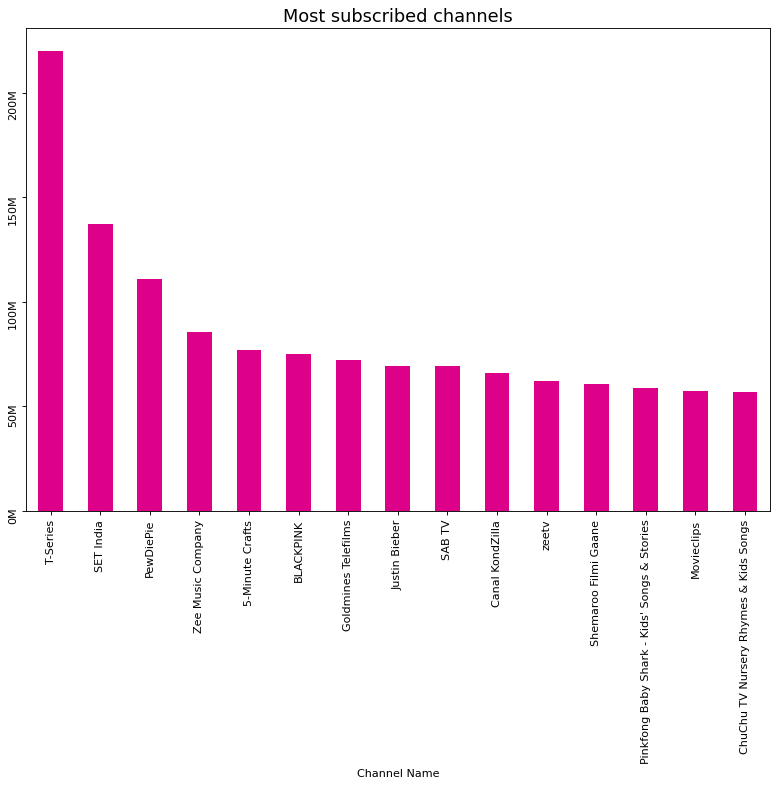

In [22]:
subscriber=df_no.groupby("Channel Name")["followers"].sum().nlargest(15)
plt.figure(figsize=(12,8),dpi=80)
subscriber.plot.bar(color="#dd0088")
plt.yticks([0.00e+08,0.50e+08,1.00e+08,1.50e+08,2.00e+08],labels = ['0M','50M','100M','150M','200M'],rotation=90)
plt.title("Most subscribed channels",fontsize=16)
plt.show()



### Relationship between Number of subscribers and Views on the channel

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


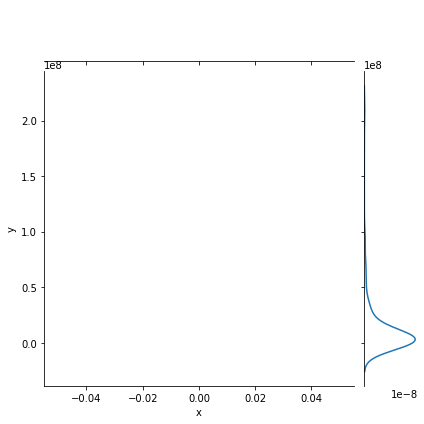

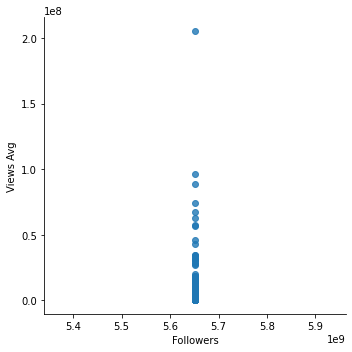

In [23]:
m=pd.DataFrame({"x":df_no["followers"].sum(),"y":df_no["Views Avg."]})
ax=sns.jointplot(x="x",y="y",data=m,kind="kde")
ax=sns.lmplot(x="x", y="y", data=m)
ax.set(xlabel='Followers', ylabel='Views Avg')





### Channels with the most engagement rate

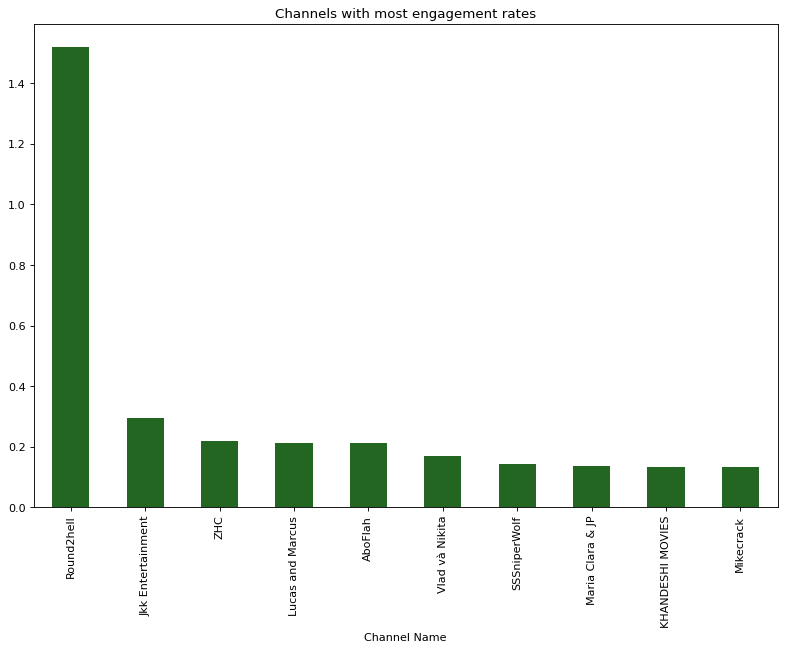

In [24]:
engagement=df_no.groupby("Channel Name")["Engagement Rate"].sum().nlargest(10)
plt.figure(figsize=(12,8),dpi=80)
engagement.plot.bar(color="#226622")
plt.title("Channels with most engagement rates")
plt.show()

### Highly commented Youtube Channel

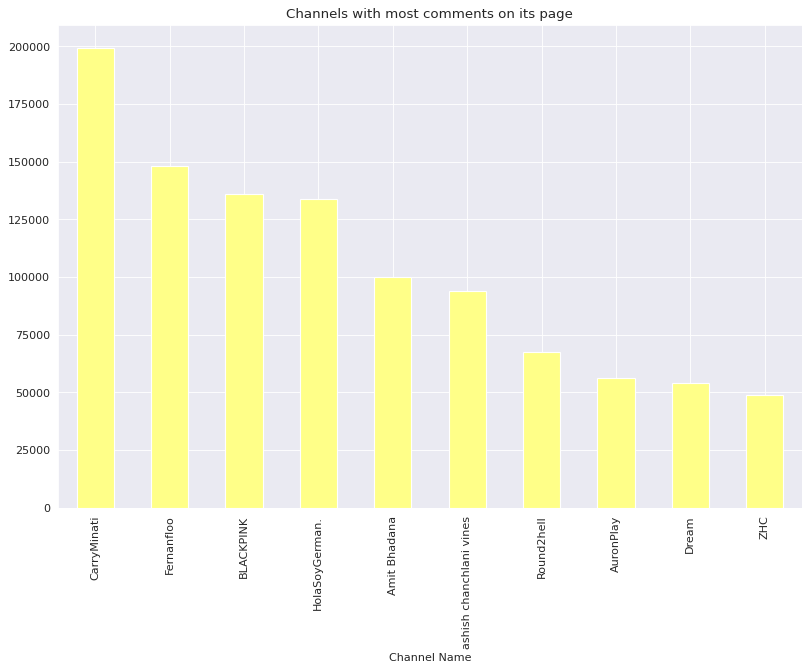

In [25]:
sns.set_style("darkgrid")
comments=df_no.groupby("Channel Name")["Comments Avg"].sum().nlargest(10)
plt.figure(figsize=(12,8),dpi=80)
comments.plot.bar(color="#ffff88")
plt.title("Channels with most comments on its page")
plt.show()

### Pairplot for all the attributes of the given dataframe

<Figure size 1800x504 with 0 Axes>

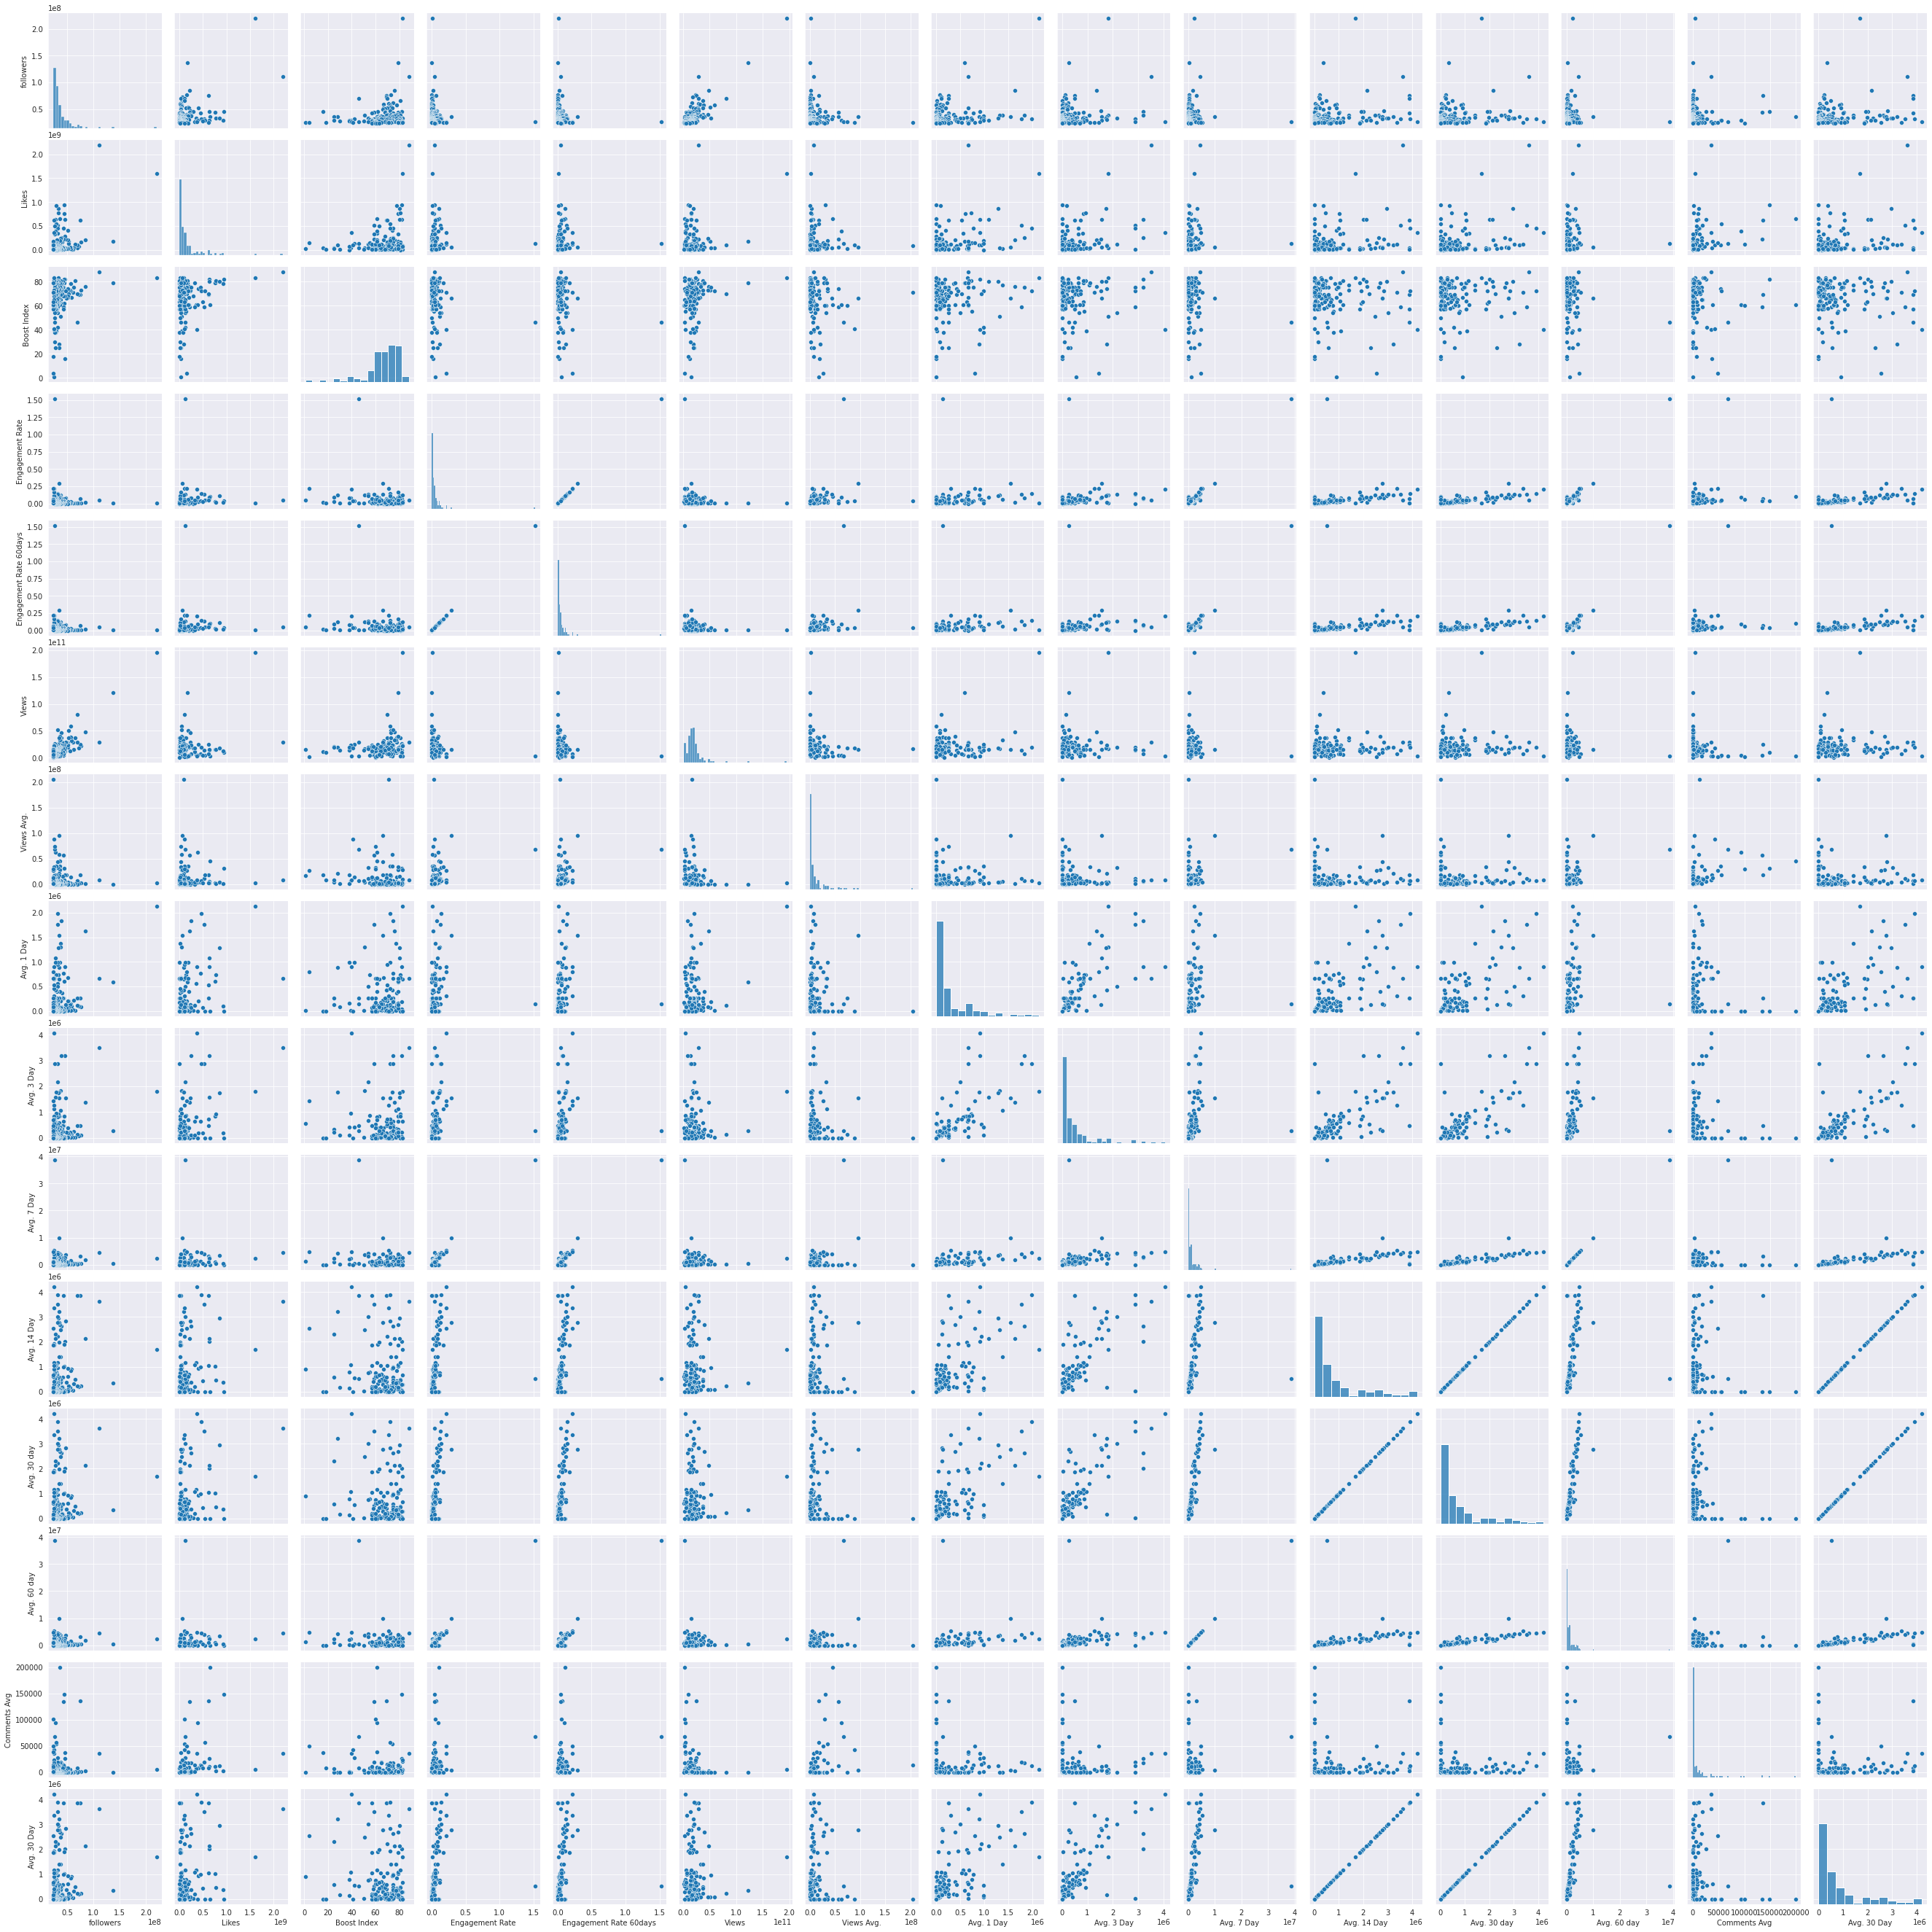

In [26]:
plt.figure(figsize=(25,7))
sns.pairplot(df_no)

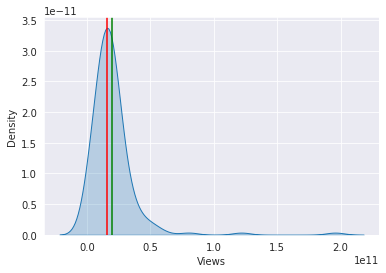

In [27]:
sns.kdeplot(df_no['Views'],fill=True)
plt.axvline(df_no['Views'].mean(),color='g')
plt.axvline(df_no['Views'].median(),color='r')

<AxesSubplot:xlabel='Views', ylabel='Count'>

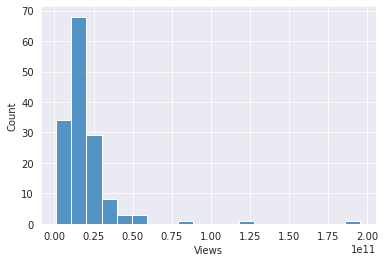

In [28]:
sns.histplot(df_no['Views'],bins=20)

## Pipelining

In [5]:
col_names = list(df.columns)
col_names

['Country',
 'Channel Name',
 'Category',
 'Main Video Category',
 'username',
 'followers',
 'Main topic',
 'More topics',
 'Likes',
 'Boost Index',
 'Engagement Rate',
 'Engagement Rate 60days',
 'Views',
 'Views Avg.',
 'Avg. 1 Day',
 'Avg. 3 Day',
 'Avg. 7 Day',
 'Avg. 14 Day',
 'Avg. 30 day',
 'Avg. 60 day',
 'Comments Avg',
 'Youtube Link']

In [7]:
df.shape

(857, 22)

In [9]:
df.isna().sum()


Country                   150
Channel Name                0
Category                  121
Main Video Category         2
username                    0
followers                   0
Main topic                  2
More topics                 2
Likes                       0
Boost Index                 0
Engagement Rate             2
Engagement Rate 60days      0
Views                       0
Views Avg.                  2
Avg. 1 Day                363
Avg. 3 Day                205
Avg. 7 Day                116
Avg. 14 Day                78
Avg. 30 day                42
Avg. 60 day                 0
Comments Avg                2
Youtube Link                0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 707 non-null    object 
 1   Channel Name            857 non-null    object 
 2   Category                736 non-null    object 
 3   Main Video Category     855 non-null    object 
 4   username                857 non-null    object 
 5   followers               857 non-null    int64  
 6   Main topic              855 non-null    object 
 7   More topics             855 non-null    object 
 8   Likes                   857 non-null    float64
 9   Boost Index             857 non-null    int64  
 10  Engagement Rate         855 non-null    float64
 11  Engagement Rate 60days  857 non-null    float64
 12  Views                   857 non-null    int64  
 13  Views Avg.              855 non-null    float64
 14  Avg. 1 Day              494 non-null    fl

In [11]:
cat_columns = ['Country','Channel Name','Category','Main Video Category','username','Main topic','More topics','Youtube Link']
cat_columns

['Country',
 'Channel Name',
 'Category',
 'Main Video Category',
 'username',
 'Main topic',
 'More topics',
 'Youtube Link']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 707 non-null    object 
 1   Channel Name            857 non-null    object 
 2   Category                736 non-null    object 
 3   Main Video Category     855 non-null    object 
 4   username                857 non-null    object 
 5   followers               857 non-null    int64  
 6   Main topic              855 non-null    object 
 7   More topics             855 non-null    object 
 8   Likes                   857 non-null    float64
 9   Boost Index             857 non-null    int64  
 10  Engagement Rate         855 non-null    float64
 11  Engagement Rate 60days  857 non-null    float64
 12  Views                   857 non-null    int64  
 13  Views Avg.              855 non-null    float64
 14  Avg. 1 Day              494 non-null    fl

In [13]:
num_columns = ['followers','Likes','Boost Index','Engagement Rate','Engagement Rate 60days','Views','Views Avg.','Comments Avg']
num_columns

['followers',
 'Likes',
 'Boost Index',
 'Engagement Rate',
 'Engagement Rate 60days',
 'Views',
 'Views Avg.',
 'Comments Avg']

In [15]:
df['Views'].value_counts()


195660744416    9
133025325473    9
121741739317    9
77340155581     9
16242634269     9
               ..
9854766293      2
13680917903     2
16411208086     2
10255466904     2
4012190177      2
Name: Views, Length: 200, dtype: int64

In [16]:
p_cat = Pipeline([
                   ('impute', SimpleImputer(strategy = 'most_frequent')),  # Impute object to impute cat_data
                   ('ohe', OneHotEncoder())           # One hot encode object  
                  ])


In [17]:
p_cat.fit_transform(df[cat_columns])

<857x764 sparse matrix of type '<class 'numpy.float64'>'
	with 6856 stored elements in Compressed Sparse Row format>

In [18]:
p_num = Pipeline([
                  ('impute', SimpleImputer(strategy = 'median')),  # Impute object to impute numerical data
                  ('ss', StandardScaler())        # StandardScale object to normalize numerical data
                  ]
                 )

In [19]:
p_num.fit_transform(df[num_columns])

array([[ 5.96001504,  3.54794637,  1.04353955, ...,  6.03096645,
        -0.39632117, -0.3373673 ],
       [ 3.09311452, -0.03136978, -0.2938515 , ...,  3.79046477,
         1.51841437, -0.47148138],
       [ 3.05815232, -0.15083201,  0.77606134, ...,  3.386845  ,
        -0.45209155, -0.47365495],
       ...,
       [-0.89257643, -0.30857515, -0.49446016, ..., -0.88825896,
         0.38273756,  2.61666757],
       [-0.89257643, -0.13045586, -0.4275906 , ..., -0.83684169,
        -0.09538841,  0.70909103],
       [-0.89257643, -0.32713124, -0.2938515 , ..., -0.76934871,
        -0.43574077, -0.43554748]])

In [20]:
ct = ColumnTransformer( 
                    [
                      ('cp', p_cat,cat_columns),   # p_cat pipe to process upon cat_columns
                      ('nc', p_num, num_columns)    # p_num pipe to process upon num_columns
                          
                    ]
                  )

In [21]:
ct.fit_transform(df)

<857x772 sparse matrix of type '<class 'numpy.float64'>'
	with 13712 stored elements in Compressed Sparse Row format>

In [22]:
[ ('ct', ct), ('dt', DecisionTreeClassifier())]

main_pipe = Pipeline(
                      [
                       ('ct', ct),      # ct (column transformer object)
                       ('dt', DecisionTreeClassifier())      # DecisionTreeClassifier object
                      
                      ]
                     )

In [23]:
df.columns

Index(['Country', 'Channel Name', 'Category', 'Main Video Category',
       'username', 'followers', 'Main topic', 'More topics', 'Likes',
       'Boost Index', 'Engagement Rate', 'Engagement Rate 60days', 'Views',
       'Views Avg.', 'Avg. 1 Day', 'Avg. 3 Day', 'Avg. 7 Day', 'Avg. 14 Day',
       'Avg. 30 day', 'Avg. 60 day', 'Comments Avg', 'Youtube Link'],
      dtype='object')

In [66]:
y_train = df['Views']
X_train = df

In [32]:
model = main_pipe.fit(X_train,y_train)

In [33]:
main_pipe.predict(X_train)

array([195660744416, 133025325473, 121741739317,  28424113942,
        16242634269,  80111555805,  77340155581, 195660744416,
       133025325473, 121741739317,  28424113942,  16242634269,
        80111555805,  77340155581,  69794363750,  48162039794,
        65143080313,  22655274758,  24247825120,  17652030516,
        28347084231,  80431073293,  17072262758,  23493409219,
        36444038220,  16034166113,  28365791631,  31514954950,
        14560770809,  58434633172,  38747673464,  13279526225,
        50613413464,  36796548363,  23404734521,  19574295579,
        27642363836,  27298793597,  24301972405,  21945548174,
        23663272345,  49013318189,  28700714072,  28692968075,
        25296371488,  13594315965,  11810491835,  18491954095,
         9934602477,  25062652229,  15287605140,   4101958915,
         9969944772,   4725838896,   7206933910,  23815643998,
        23588674274,  11617072443,  22382018623,  18673777146,
        15999397373,  28323109702,  24158005861,   7469

In [38]:
set_config(display='diagram')
main_pipe

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('cp',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Country', 'Channel Name',
                                                   'Category',
                                                   'Main Video Category',
                                                   'username', 'Main topic',
                                                   'More topics',
                                                   'Youtube Link']),
                                                 ('nc',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['followers', 'Likes',
                                                   'Boost Index',
                                                   'Engagement Rate',
                                                   'Engagement Rate 60days',
                                                   'Views', 'Views Avg.',
                                                   'Comments Avg'])])),
                ('dt', DecisionTreeClassifier())])

In [62]:
non_floats = []
for col in df:
    if df[col].dtypes != "float64":
        non_floats.append(col)
df1 = df.drop(columns=non_floats)

In [39]:
from sklearn.model_selection import ShuffleSplit, KFold
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=17)

In [63]:
df1.head()


,Likes,Engagement Rate,Engagement Rate 60days,Views Avg.,Avg. 1 Day,Avg. 3 Day,Avg. 7 Day,Avg. 14 Day,Avg. 30 day,Avg. 60 day,Comments Avg
0,1.602680e+09,0.033463,0.010879,2.095329e+06,1.522448e+05,2134569.625,1.809830e+06,2.306178e+06,1.676330e+06,2.295416e+06,4493.984146
1,2.209901e+08,0.641716,0.116004,7.027126e+07,1.837916e+06,1837916.000,4.891832e+06,7.052576e+06,1.265433e+07,1.572284e+07,146.700252
2,1.748752e+08,0.001206,0.002366,1.095729e+05,NaN,586040.000,2.801276e+05,3.437881e+05,3.536019e+05,3.220336e+05,76.244316
3,2.191406e+09,0.063426,0.044846,7.718345e+06,NaN,NaN,3.497395e+06,3.094440e+06,3.620274e+06,4.454120e+06,35839.781347
4,1.731833e+09,0.729210,0.570270,9.876250e+07,NaN,NaN,2.994102e+07,2.994102e+07,2.994102e+07,5.343473e+07,113432.373684


In [96]:
df1.isna().sum()


Likes                     0
Engagement Rate           0
Engagement Rate 60days    0
Views Avg.                0
Avg. 60 day               0
Comments Avg              0
dtype: int64

In [86]:
df1 = df1.drop(['Avg. 1 Day','Avg. 3 Day','Avg. 7 Day','Avg. 14 Day','Avg. 30 day'], axis=1)

In [95]:
df1=df1.dropna(axis=0)

In [97]:
df1.shape

(855, 6)

In [98]:
df1.head()

,Likes,Engagement Rate,Engagement Rate 60days,Views Avg.,Avg. 60 day,Comments Avg
0,1.602680e+09,0.033463,0.010879,2.095329e+06,2.295416e+06,4493.984146
1,2.209901e+08,0.641716,0.116004,7.027126e+07,1.572284e+07,146.700252
2,1.748752e+08,0.001206,0.002366,1.095729e+05,3.220336e+05,76.244316
3,2.191406e+09,0.063426,0.044846,7.718345e+06,4.454120e+06,35839.781347
4,1.731833e+09,0.729210,0.570270,9.876250e+07,5.343473e+07,113432.373684


In [99]:
y_train1 = df1['Likes']
X_train1 = df1

In [100]:
X = X_train1
y = y_train1

In [101]:
# 4. Split dataset into train and validation parts
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.35,
                                                    shuffle = True,
                                                    stratify = y
                                                    )

# 4.1
X_train.shape        # (65025, 30)
X_test.shape         # (35014, 30)
y_train.shape        # (65025,)
y_test.shape         # (35014,)

(555, 6)

(300, 6)

(555,)

(300,)

In [102]:
steps_xg = [('sts', ss() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=3)        # Specify other parameters here
            )
            ]

# 5.1  Instantiate Pipeline object

pipe_xg = Pipeline(steps_xg)

In [103]:
print("\n\n--Which parameters can be tuned?--\n\n")
pipe_xg.get_params()



--Which parameters can be tuned?--




{'memory': None,
 'steps': [('sts', StandardScaler()),
  ('pca', PCA()),
  ('xg',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, gamma=None,
                 gpu_id=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                 max_leaves=None, min_child_weight=None, missing=nan,
                 monotone_constraints=None, n_estimators=100, n_jobs=3,
                 num_parallel_tree=None, predictor=None, random_state=None,
                 reg_alpha=None, reg_lambda=None, ...))],
 'verbose': False,
 'sts': StandardScaler(),
 'pca': PCA(),
 'xg': XGBClassifier(base_score=None, booster=None, callbacks=None,
               c

In [104]:
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
              'xg__n_estimators':   [200,  300],  # Number of boosted trees to fit
                                                  # l1 and l2 specifications will change
                                                  # the values of coeff of boosted trees
                                                  # but not their numbers

              'xg__max_depth':      [4,6],
              'pca__n_components' : [25,30],
              'xg__booster': ['gbtree','gblinear']
              }   

In [105]:
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
               'xg__max_depth':      [4,6],
 
              'pca__n_components' : [25,30],
               }                               # Total: 2 * 2 * 2 * 2

In [106]:
clf = GridSearchCV(pipe_xg,            # pipeline object
                   parameters,         # possible parameters
                   n_jobs = 2,         # USe parallel cpu threads
                   cv =2 ,             # No of folds
                   verbose =1,         # Higher the value, more the verbosity
                   scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                   refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                   )

In [107]:
# 7.2. Start fitting pipeline to data
print("\n\n--Takes time...---\n")
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60 



--Takes time...---

Fitting 2 folds for each of 8 candidates, totalling 16 fits


ValueError: 
All the 16 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/harshchauhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/harshchauhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/harshchauhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/harshchauhan/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/harshchauhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 870, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/Users/harshchauhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_pca.py", line 433, in fit_transform
    U, S, Vt = self._fit(X)
  File "/Users/harshchauhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_pca.py", line 483, in _fit
    return self._fit_full(X, n_components)
  File "/Users/harshchauhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_pca.py", line 501, in _fit_full
    raise ValueError(
ValueError: n_components=25 must be between 0 and min(n_samples, n_features)=6 with svd_solver='full'

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/harshchauhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/harshchauhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/harshchauhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/harshchauhan/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/harshchauhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 870, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/Users/harshchauhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_pca.py", line 433, in fit_transform
    U, S, Vt = self._fit(X)
  File "/Users/harshchauhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_pca.py", line 483, in _fit
    return self._fit_full(X, n_components)
  File "/Users/harshchauhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_pca.py", line 501, in _fit_full
    raise ValueError(
ValueError: n_components=30 must be between 0 and min(n_samples, n_features)=6 with svd_solver='full'
